### Use celltypist conda environment

In [1]:
import os
import logging

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns

import scipy.io
import numpy as np
import scipy as sp
import pandas as pd

import celltypist
from celltypist import models

import anndata
import scanpy as sc
sc.settings.verbosity = 3

from misc import *
from bcg_utils import *
_ = setup_plotting(style='ticks', context='notebook')

In [2]:
data_dir = os.path.join('..', 'data', 'scRNAseq_YangLi')
prefix = os.path.join(data_dir, 'bcg0712_complete.QC2.SCT_log_counts.UMAP.QC3')
results_dir = os.path.join('results', 'scRNAseq')

# Load

In [3]:
adata = anndata.read_h5ad(f'{prefix}.h5ad')
adata

AnnData object with n_obs × n_vars = 177420 × 20856
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'status', 'assignment', 'cells', 'age', 'gender', 'time', 'stim', 'ts', 'batch', 'pool', 'bp', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters', 'clusters1', 'cell_ts', 'ids', 'datafile', 'groupby', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'high_mt_frac', 'louvain', 'leiden'
    var: 'features', 'n_cells', 'sct_variance', 'mean', 'std'
    uns: 'highlight_colors', 'leiden', 'leiden3_colors', 'leiden5_colors', 'leiden_colors', 'louvain', 'louvain3_colors', 'louvain5_colors', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
models.download_models(force_update=True)
predictions_low = celltypist.annotate(adata, model='Immune_All_Low.pkl', majority_voting=True)
predictions_high = celltypist.annotate(adata, model='Immune_All_High.pkl', majority_voting=True)
adata = predictions_high.to_adata(prefix='high_level_')
adata = predictions_low.to_adata(prefix='low_level_')

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 12
📂 Storing models in /home/lfolkman/.celltypist/data/models
💾 Downloading model [1/12]: Immune_All_Low.pkl
💾 Downloading model [2/12]: Immune_All_High.pkl
💾 Downloading model [3/12]: Adult_Mouse_Gut.pkl
💾 Downloading model [4/12]: COVID19_Immune_Landscape.pkl
💾 Downloading model [5/12]: Cells_Fetal_Lung.pkl
💾 Downloading model [6/12]: Cells_Intestinal_Tract.pkl
💾 Downloading model [7/12]: Cells_Lung_Airway.pkl
💾 Downloading model [8/12]: Developing_Mouse_Brain.pkl
💾 Downloading model [9/12]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [10/12]: Human_Lung_Atlas.pkl
💾 Downloading model [11/12]: Nuclei_Lung_Airway.pkl
💾 Downloading model [12/12]: Pan_Fetal_Human.pkl
🔬 Input data has 177420 cells and 20856 genes
🔗 Matching reference genes in the model
🧬 5430 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood 

In [5]:
adata.write(f'{prefix}.UMAP.QC3.celltypes.h5ad', compression='gzip')

In [6]:
adata.obs['high_level_majority_voting'].unique().tolist()

['T cells',
 'Macrophages',
 'B cells',
 'HSC/MPP',
 'ILC',
 'Monocytes',
 'Megakaryocytes/platelets',
 'pDC',
 'DC',
 'Plasma cells']

In [7]:
adata.obs['low_level_majority_voting'].unique().tolist()

['Tcm/Naive helper T cells',
 'Tem/Effector helper T cells',
 'Tcm/Naive cytotoxic T cells',
 'Intermediate macrophages',
 'Age-associated B cells',
 'Tem/Trm cytotoxic T cells',
 'Regulatory T cells',
 'Naive B cells',
 'HSC/MPP',
 'MAIT cells',
 'Memory B cells',
 'CD16+ NK cells',
 'Tem/Temra cytotoxic T cells',
 'Non-classical monocytes',
 'Megakaryocytes/platelets',
 'Classical monocytes',
 'NK cells',
 'CRTAM+ gamma-delta T cells',
 'pDC',
 'DC2',
 'CD16- NK cells',
 'Plasma cells']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


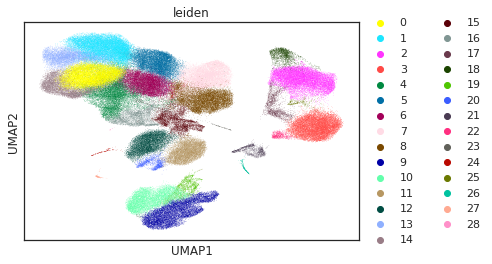

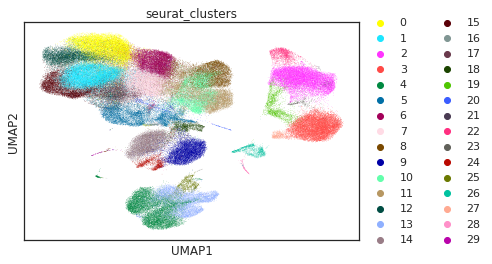

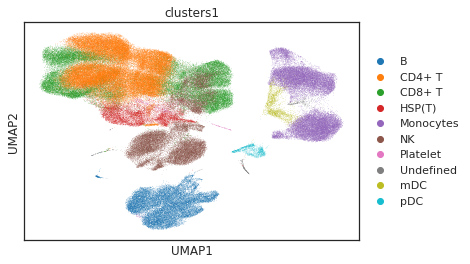

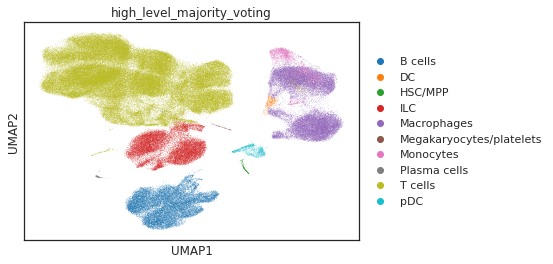

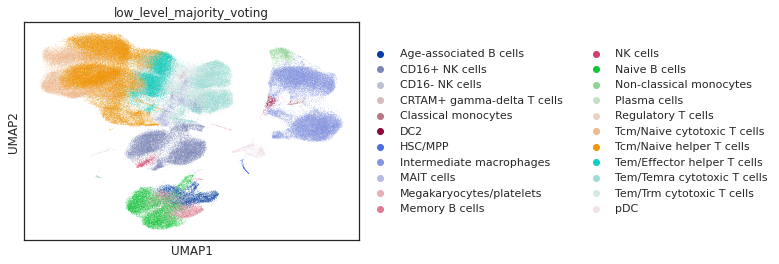

In [8]:
for color in ['leiden', 'seurat_clusters', 'clusters1', 'high_level_majority_voting', 'low_level_majority_voting']:
    sc.pl.umap(adata, color=color)
    plt.show()

In [153]:
adata.obs['celltypist'] = adata.obs['high_level_majority_voting'].copy()

17: 1956


... storing 'highlight' as categorical


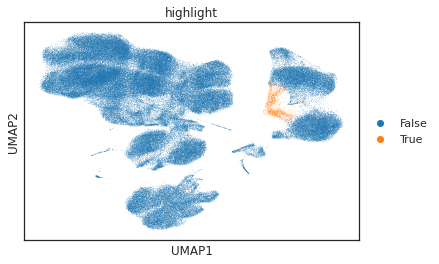

In [154]:
C = '17'
mask = adata.obs['leiden'] == C
adata.obs['highlight'] = mask.astype(str)
print(f'{C}: {mask.sum()}')
sc.pl.umap(adata, color='highlight')
adata.obs.loc[mask, 'celltypist'] = 'DC'

24: 448


... storing 'highlight' as categorical


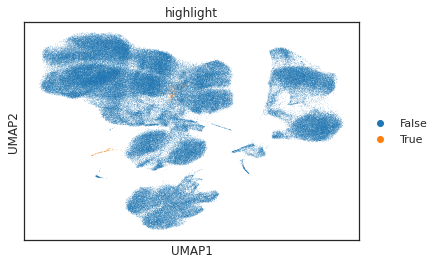

25: 351


... storing 'highlight' as categorical
... storing 'celltypist' as categorical


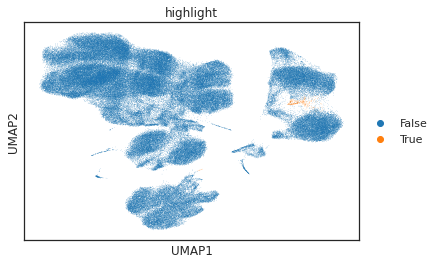

In [155]:
for C in ['24', '25']:
    mask = adata.obs['leiden'] == C
    adata.obs['highlight'] = mask.astype(str)
    print(f'{C}: {mask.sum()}')
    sc.pl.umap(adata, color='highlight')
    adata.obs['celltypist'] = adata.obs['celltypist'].astype(str)
    adata.obs.loc[mask, 'celltypist'] = 'Other'

Non-classical monocytes: 1577


... storing 'highlight' as categorical
... storing 'celltypist' as categorical


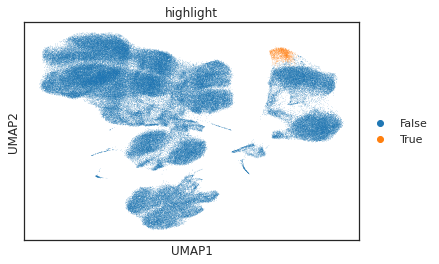

In [156]:
C = 'Non-classical monocytes'
mask = adata.obs['low_level_majority_voting'] == C
adata.obs['highlight'] = mask.astype(str)
print(f'{C}: {mask.sum()}')
sc.pl.umap(adata, color='highlight')
adata.obs['celltypist'] = adata.obs['celltypist'].astype(str)
adata.obs.loc[mask, 'celltypist'] = C

2-3-22: 26784


... storing 'highlight' as categorical
... storing 'celltypist' as categorical


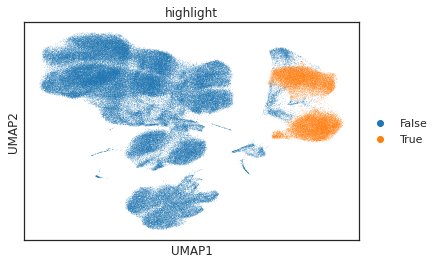

In [157]:
mask = adata.obs['leiden'].isin(['2', '3', '22'])
adata.obs['highlight'] = mask.astype(str)
print(f'2-3-22: {mask.sum()}')
sc.pl.umap(adata, color='highlight')
adata.obs['celltypist'] = adata.obs['celltypist'].astype(str)
adata.obs.loc[mask, 'celltypist'] = 'Macrophages'
adata.obs.loc[adata.obs['celltypist'] == 'Monocytes', 'celltypist'] = 'Macrophages'

7: 10577


... storing 'highlight' as categorical
... storing 'celltypist' as categorical


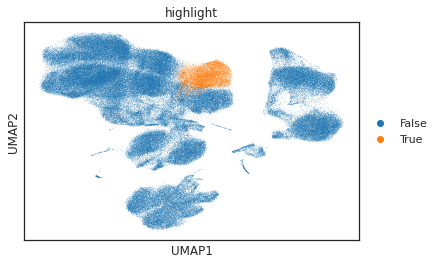

8: 10349


... storing 'highlight' as categorical


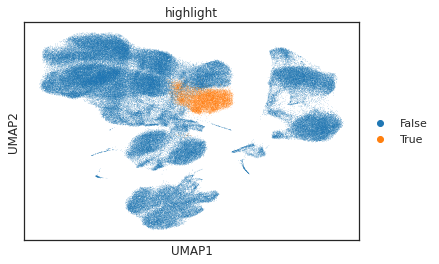

In [158]:
for C in ['7', '8']:
    mask = adata.obs['leiden'] == C
    adata.obs['highlight'] = mask.astype(str)
    print(f'{C}: {mask.sum()}')
    sc.pl.umap(adata, color='highlight')

In [159]:
adata.obs['celltypist'] = adata.obs['celltypist'].replace({'ILC': 'NK', 'Macrophages': 'Monocytes'})
adata.obs['celltypist'] = adata.obs['celltypist'].astype(str)

adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].str.contains('cytotoxic T cells'), 'celltypist'] = 'CD8+ T'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].str.contains('helper T cells'), 'celltypist'] = 'CD4+ T'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & (adata.obs['low_level_majority_voting'] == 'Regulatory T cells'), 'celltypist'] = 'Tregs'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].isin(['CD16+ NK cells']), 'celltypist'] = 'CD8+ T'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].isin(['CRTAM+ gamma-delta T cells']), 'celltypist'] = 'CRTAM+ gamma-delta T cells'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['leiden'].isin(['7', '8']), 'celltypist'] = 'CD8+ T'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].isin(['MAIT cells']), 'celltypist'] = 'MAIT cells'
adata.obs.loc[(adata.obs['celltypist'] == 'T cells') & adata.obs['low_level_majority_voting'].isin(['Intermediate macrophages']), 'celltypist'] = 'Other'
adata.obs.loc[adata.obs['celltypist'].isin(['Megakaryocytes/platelets']), 'celltypist'] = 'Other'

... storing 'celltypist' as categorical


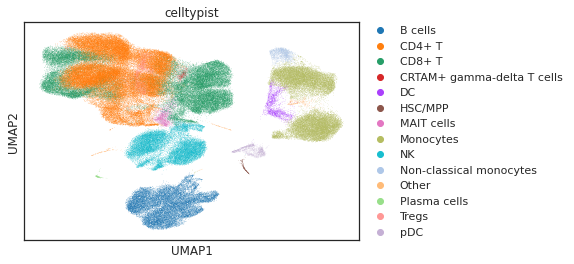

CD4+ T: 63041


... storing 'highlight' as categorical


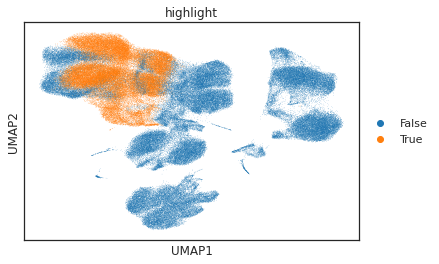

CD8+ T: 39236


... storing 'highlight' as categorical


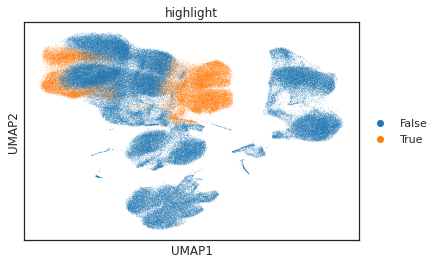

Monocytes: 27119


... storing 'highlight' as categorical


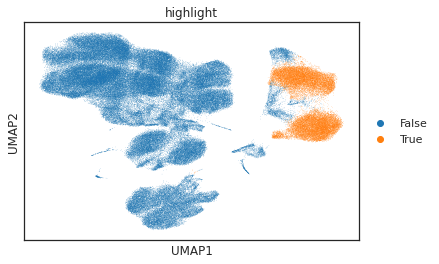

B cells: 19813


... storing 'highlight' as categorical


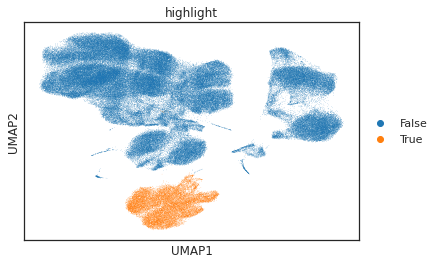

Tregs: 2411


... storing 'highlight' as categorical


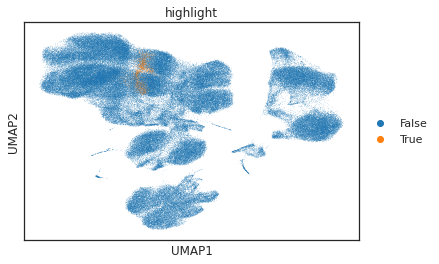

HSC/MPP: 214


... storing 'highlight' as categorical


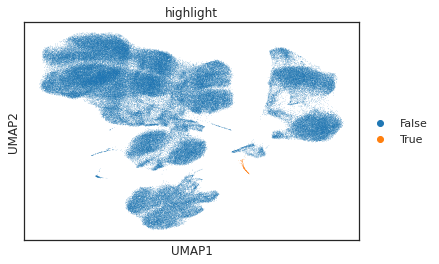

NK: 17939


... storing 'highlight' as categorical


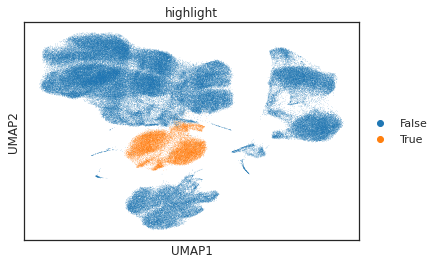

MAIT cells: 1572


... storing 'highlight' as categorical


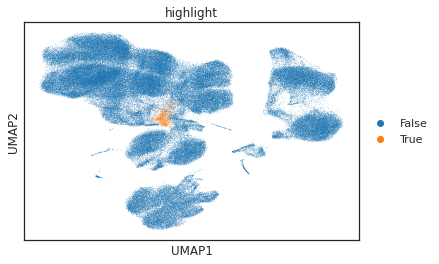

Non-classical monocytes: 1576


... storing 'highlight' as categorical


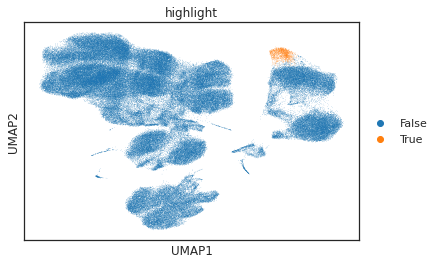

Other: 894


... storing 'highlight' as categorical


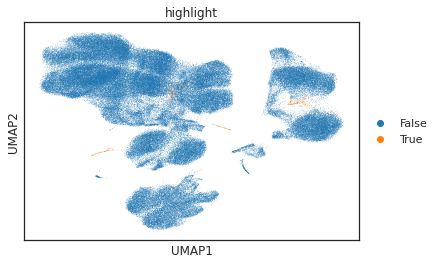

CRTAM+ gamma-delta T cells: 336


... storing 'highlight' as categorical


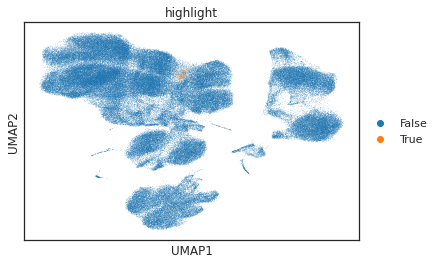

pDC: 1184


... storing 'highlight' as categorical


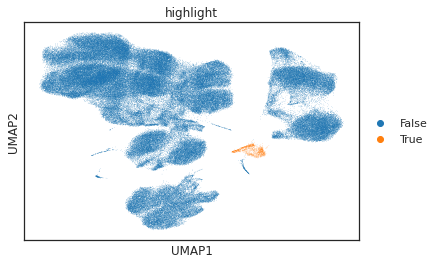

DC: 1957


... storing 'highlight' as categorical


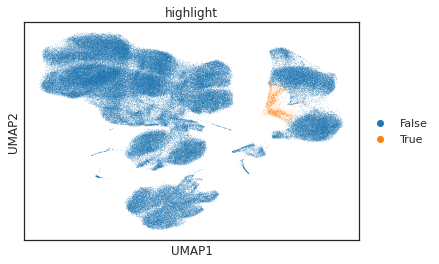

Plasma cells: 128


... storing 'highlight' as categorical


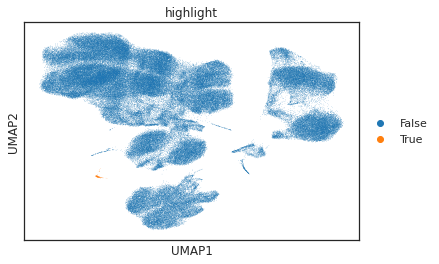

In [160]:
sc.pl.umap(adata, color='celltypist')
plt.show()

for C in adata.obs['celltypist'].unique():
    cts = adata.obs['celltypist'] == C
    adata.obs['highlight'] = cts.astype(str)
    print(f'{C}: {cts.sum()}')
    sc.pl.umap(adata, color='highlight')

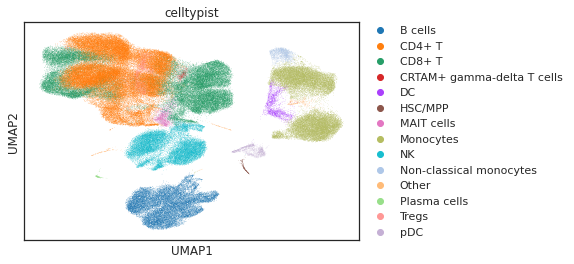

In [161]:
sc.pl.umap(adata, color='celltypist')
plt.show()

In [168]:
adata.obs['PBMC'] = np.nan
adata.obs.loc[adata.obs['celltypist'] != 'Other', 'PBMC'] = 'PBMC'
adata.obs['PBMC'].unique()

array(['PBMC', nan], dtype=object)

In [170]:
adata.obs['T_cells'] = np.nan
adata.obs.loc[adata.obs['high_level_majority_voting'] == 'T cells', 'T_cells'] = 'T cells'
adata.obs['T_cells'].unique()

array(['T cells', nan], dtype=object)

In [ ]:
adata.write(f'{prefix}.celltypes.h5ad', compression='gzip')

In [183]:
np.asarray(adata.X[:, 0].todense()).squeeze()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
adata.write(f'{prefix}.SCT_residuals.h5ad', compression='gzip')

In [185]:
res_adata = anndata.read_h5ad(os.path.join(data_dir, 'bcg0712_complete.QC2.SCT_residuals.h5ad'))
res_adata

AnnData object with n_obs × n_vars = 181446 × 20856
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'status', 'assignment', 'cells', 'age', 'gender', 'time', 'stim', 'ts', 'batch', 'pool', 'bp', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters', 'clusters1', 'cell_ts', 'ids', 'datafile', 'groupby', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'high_mt_frac'
    var: 'features', 'n_cells', 'sct_variance'

In [191]:
res_adata = res_adata[res_adata.obs.index.isin(adata.obs.index)]
assert res_adata.obs_names.equals(adata.obs_names)

In [197]:
sc.pp.pca(adata, use_highly_variable=False)
sc.pp.neighbors(adata) # n_pcs=0
sc.tl.louvain(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:01:52)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:43)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:36)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:04)


In [198]:
CELLTYPE_COLS = ['high_level_predicted_labels', 'high_level_over_clustering',
       'high_level_majority_voting', 'high_level_conf_score',
       'low_level_predicted_labels', 'low_level_over_clustering',
       'low_level_majority_voting', 'low_level_conf_score',
       'celltypist', 'PBMC', 'T_cells']
res_adata.obs[CELLTYPE_COLS] = adata.obs[CELLTYPE_COLS]

Trying to set attribute `.obs` of view, copying.


In [199]:
res_adata.write(os.path.join(data_dir, 'bcg0712_complete.QC2.SCT_residuals.UMAP.QC3.celltypes.h5ad'), compression='gzip')